In [17]:
import numpy as np
import pandas as pd
import time

In [18]:
# Set seed for reproducibility
np.random.seed(42)

# Create a synthetic dataset
n_samples = 400
df = pd.DataFrame({
    'User ID': range(1, n_samples + 1),
    'Gender': np.random.choice(['Male', 'Female'], size=n_samples),
    'Age': np.random.randint(18, 60, size=n_samples),
    'EstimatedSalary': np.random.randint(20000, 150000, size=n_samples),
    'Purchased': np.random.choice([0, 1], size=n_samples)
})

In [19]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,1,Male,41,131854,0
1,2,Female,28,132816,1
2,3,Male,25,148778,1
3,4,Male,53,82292,0
4,5,Male,55,43833,0


In [20]:
df = df[['Age','EstimatedSalary','Purchased']]

In [21]:
df.head()

,Age,EstimatedSalary,Purchased
0,41,131854,0
1,28,132816,1
2,25,148778,1
3,53,82292,0
4,55,43833,0


In [22]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [23]:
X

,Age,EstimatedSalary
0,41,131854
1,28,132816
2,25,148778
3,53,82292
4,55,43833
...,...,...
395,22,62929
396,50,147309
397,18,87444
398,35,28567


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [25]:
X_scaled.shape

(400, 2)

In [26]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [27]:
#X_train.shape

In [28]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [29]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=50,batch_size=1,validation_split=0.2)
#print(time.time() - start)

Epoch 1/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5186 - loss: 0.6980 - val_accuracy: 0.5125 - val_loss: 0.6919
Epoch 2/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5093 - loss: 0.6948 - val_accuracy: 0.5250 - val_loss: 0.6918
Epoch 3/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5090 - loss: 0.6941 - val_accuracy: 0.5500 - val_loss: 0.6908
Epoch 4/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5204 - loss: 0.6946 - val_accuracy: 0.5125 - val_loss: 0.6931
Epoch 5/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5145 - loss: 0.7017 - val_accuracy: 0.5125 - val_loss: 0.6963
Epoch 6/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5671 - loss: 0.6915 - val_accuracy: 0.5375 - val_loss: 0.6941
Epoch 7/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5515 - loss: 0.6888 - val_accuracy: 0.5250 - val_loss: 0.6949
Epoch 8/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5875 - loss: 0.6860 - val_accuracy: 0.

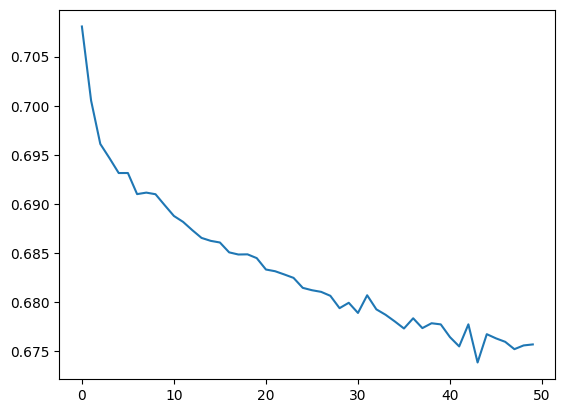

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [33]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [34]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=250,validation_split=0.2)
#print(time.time() - start)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - accuracy: 0.5376 - loss: 0.7289 - val_accuracy: 0.5125 - val_loss: 0.7244
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5254 - loss: 0.7264 - val_accuracy: 0.5250 - val_loss: 0.7222
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5247 - loss: 0.7234 - val_accuracy: 0.5250 - val_loss: 0.7206
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5293 - loss: 0.7150 - val_accuracy: 0.5250 - val_loss: 0.7186
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5112 - loss: 0.7183 - val_accuracy: 0.5250 - val_loss: 0.7172
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5207 - loss: 0.7156 - val_accuracy: 0.5250 - val_loss: 0.7160
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5232 - loss: 0.7129 - val_accuracy: 0.5375 - val_loss: 0.7147
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5258 - loss: 0.7118 - val_accuracy: 0.5000 - val_loss: 0.7137

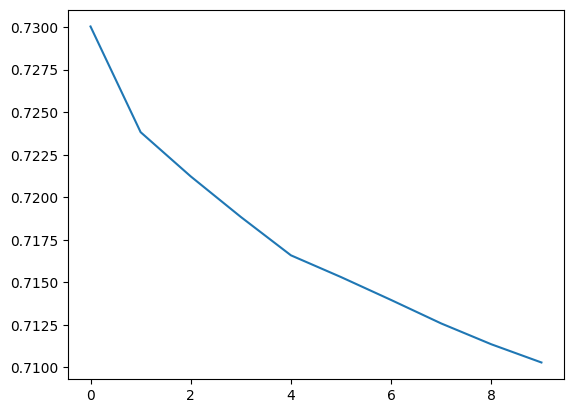

In [35]:
plt.plot(history.history['loss'])